In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# --- 1. Load and Preprocess Data ---
# Hyperparameters
VOCAB_SIZE = 10000  # Number of words to keep from the dataset
MAX_LEN = 256       # Max length of a review (pad/truncate to this)
BATCH_SIZE = 64
EPOCHS = 5

In [ ]:
# Load the IMDb dataset (already pre-tokenized as integers)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=VOCAB_SIZE)
print(f"Training sequences: {len(x_train)}, Test sequences: {len(x_test)}")

# Preprocessing: Pad sequences to the same length
x_train_pad = pad_sequences(x_train, maxlen=MAX_LEN)
x_test_pad = pad_sequences(x_test, maxlen=MAX_LEN)
print(f"Padded training sequences shape: {x_train_pad.shape}")

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training sequences: 25000, Test sequences: 25000
Padded training sequences shape: (25000, 256)


In [ ]:
# --- 2. Create the Deep Learning Model ---
model = Sequential([
    # Embedding Layer: Turns word integers into dense vectors of a fixed size.
    Embedding(input_dim=VOCAB_SIZE, output_dim=128, input_length=MAX_LEN),

    # GRU Layer: A recurrent layer efficient for sequence processing.
    GRU(64, return_sequences=False), # return_sequences=False as it's the last recurrent layer

    # Output Layer: A single neuron with a sigmoid activation for binary classification.
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# --- 3. Train the Model ---
print("\n--- Training Model ---")
history = model.fit(
    x_train_pad,
    y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(x_test_pad, y_test)
)


--- Training Model ---
Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 191s 476ms/step - accuracy: 0.6923 - loss: 0.5546 - val_accuracy: 0.8559 - val_loss: 0.3633
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 192s 453ms/step - accuracy: 0.8956 - loss: 0.2659 - val_accuracy: 0.8746 - val_loss: 0.3068
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 207s 467ms/step - accuracy: 0.9354 - loss: 0.1776 - val_accuracy: 0.8657 - val_loss: 0.3387
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 201s 466ms/step - accuracy: 0.9599 - loss: 0.1149 - val_accuracy: 0.8694 - val_loss: 0.3667
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 202s 466ms/step - accuracy: 0.9749 - loss: 0.0754 - val_accuracy: 0.8665 - val_loss: 0.3878


In [ ]:
# --- 4. Evaluate Accuracy and Display Confusion Matrix ---
print("\n--- Evaluating Model ---")
# Final evaluation on the test set
loss, accuracy = model.evaluate(x_test_pad, y_test, verbose=0)
print(f"Test Accuracy: {accuracy*100:.2f}%")
print(f"Test Loss: {loss:.4f}")


--- Evaluating Model ---
Test Accuracy: 86.65%
Test Loss: 0.3878


In [ ]:
# Generate predictions for the confusion matrix
y_pred_prob = model.predict(x_test_pad)
y_pred = (y_pred_prob > 0.5).astype("int32")

782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step


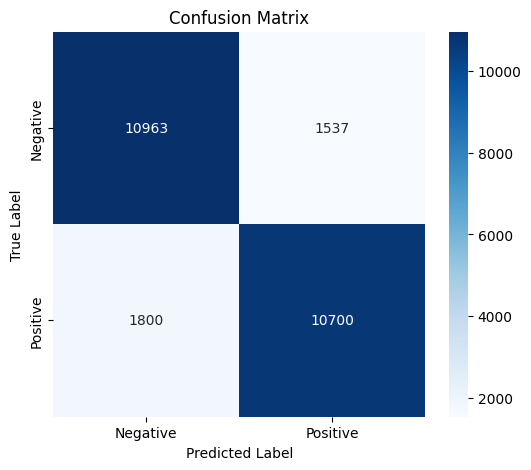

In [ ]:
# Create and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()